# SENTIMENTAL ANALYSIS

Imports and Setup

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import kagglehub

In [2]:
# Ignore FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

Dataset Loading

In [3]:
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")

100%|██████████| 54.4M/54.4M [00:03<00:00, 16.2MB/s]

Extracting files...


In [4]:
d = pd.read_csv(os.path.join(path, 'train.csv'), encoding='latin1')
f = pd.read_csv(os.path.join(path, 'test.csv'), encoding='latin1')

# Combine datasets
df = pd.concat([d, f])

print(df.shape)
print(df.info())

df.head()

(32296, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB
None


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


Cleaning and Preprocessing

In [5]:
df.dropna(inplace=True)

<Axes: xlabel='sentiment'>

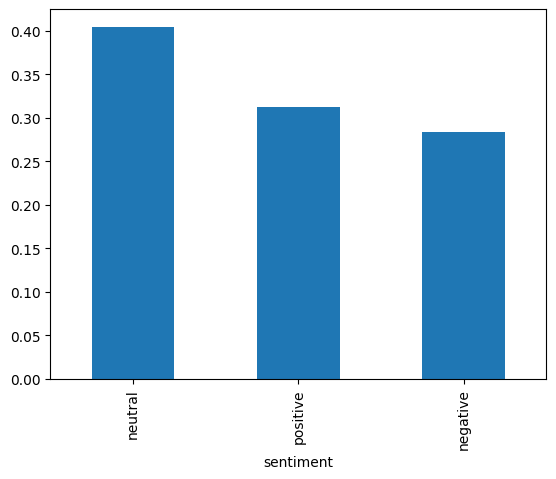

In [6]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar')


<Axes: xlabel='sentiment'>

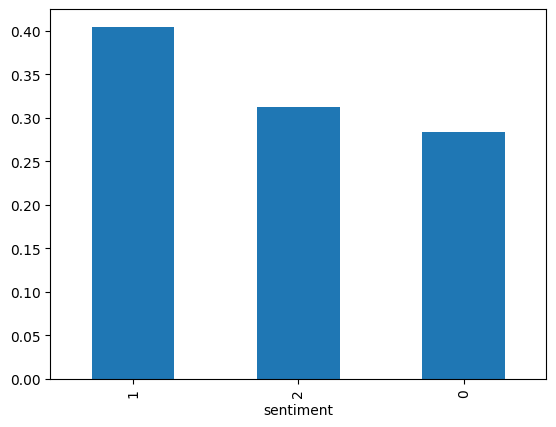

In [ ]:
df['sentiment'] = df['sentiment'].astype('category').cat.codes

df['sentiment'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
df['Time of Tweet'] = df['Time of Tweet'].astype('category').cat.codes
df['Country'] = df['Country'].astype('category').cat.codes

Feature Engineering

In [ ]:
columns_to_drop = ['textID', 'Time of Tweet', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']
existing_columns = [col for col in columns_to_drop if col in df.columns]

df.drop(columns=existing_columns, inplace=True)

Text Preprocessing Function

In [ ]:
def wp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['selected_text'] = df['selected_text'].apply(wp)


Splitting Data

In [ ]:
X = df['selected_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21984,)
(5496,)
(21984,)
(5496,)


TF-IDF Vectorization

In [ ]:
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

Baseline and Model Training


In [ ]:
score_baseline = df['sentiment'].value_counts(normalize=True).max()
print(f"Baseline score: {score_baseline}")

Baseline score: 0.40454876273653567


Logistic Regression Accuracy: 0.8302401746724891
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1572
           1       0.79      0.88      0.84      2236
           2       0.91      0.80      0.85      1688

    accuracy                           0.83      5496
   macro avg       0.84      0.82      0.83      5496
weighted avg       0.83      0.83      0.83      5496



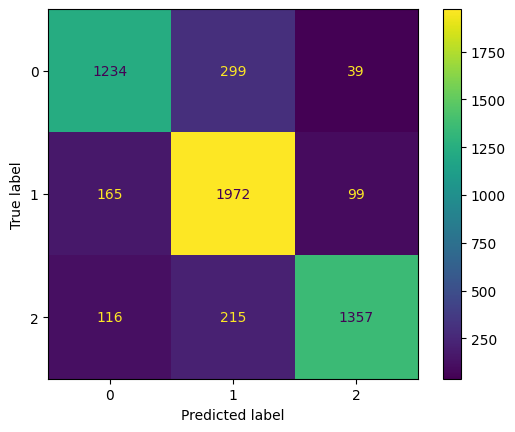

In [ ]:
# Logistic Regression
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train, y_train)
pred_lr = lr.predict(XV_test)
score_lr = accuracy_score(y_test, pred_lr)
print(f"Logistic Regression Accuracy: {score_lr}")
print(classification_report(y_test, pred_lr))
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr)

Decision Tree Accuracy: 0.7669213973799127
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1572
           1       0.76      0.78      0.77      2236
           2       0.84      0.76      0.80      1688

    accuracy                           0.77      5496
   macro avg       0.77      0.76      0.77      5496
weighted avg       0.77      0.77      0.77      5496



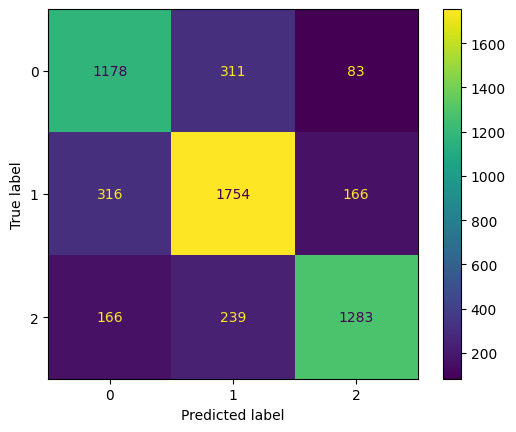

In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(XV_train, y_train)
pred_dt = dt.predict(XV_test)
score_dt = accuracy_score(y_test, pred_dt)
print(f"Decision Tree Accuracy: {score_dt}")
print(classification_report(y_test, pred_dt))
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt)

Random Forest Accuracy: 0.8138646288209607
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1572
           1       0.77      0.90      0.83      2236
           2       0.92      0.76      0.83      1688

    accuracy                           0.81      5496
   macro avg       0.83      0.80      0.81      5496
weighted avg       0.82      0.81      0.81      5496



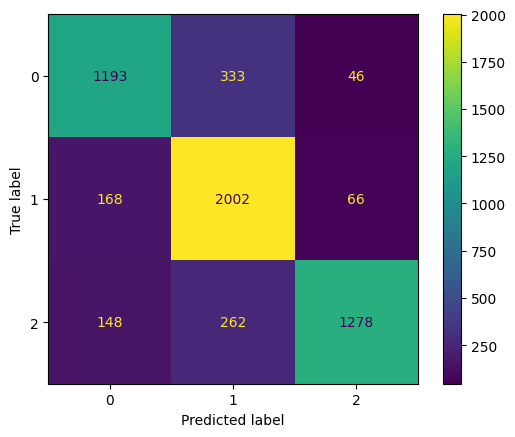

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)
pred_rfc = rfc.predict(XV_test)
score_rfc = accuracy_score(y_test, pred_rfc)
print(f"Random Forest Accuracy: {score_rfc}")
print(classification_report(y_test, pred_rfc))
ConfusionMatrixDisplay.from_predictions(y_test, pred_rfc)

In [ ]:
print(f"Baseline model: {score_baseline}\nLogistic Regression: {score_lr}\nDecision Tree Classification: {score_dt}\nRandom Forest Classifier: {score_rfc}")

Baseline model: 0.40454876273653567
Logistic Regression: 0.8302401746724891
Decision Tree Classification: 0.7621906841339156
Random Forest Classifier: 0.8138646288209607


In [ ]:
def output_label(n):
    if n == 0:
        return "The Text Sentiment is Negative"
    elif n == 1:
        return "The Text Sentiment is Neutral"
    elif n == 2:
        return "The Text Sentiment is Positive"

In [ ]:
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    return print(output_label(pred_lr[0]))

In [ ]:
text = "u are gorgeous"
manual_testing(text)

The Text Sentiment is Positive


In [ ]:
t= "u are a bitch"
manual_testing(t)

The Text Sentiment is Negative


In [ ]:
import joblib
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(vectorization, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
!pip install flask joblib

In [ ]:
import joblib

# Save the Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorization, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
pip install transformers torch

BERT INTEGRATION

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

df['selected_text'] = df['selected_text'].apply(wp)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Split data
X = df['selected_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TRAINING BERT


In [ ]:
train_dataset = SentimentDataset(X_train.tolist(), y_train.tolist(), tokenizer, max_len=128)
test_dataset = SentimentDataset(X_test.tolist(), y_test.tolist(), tokenizer, max_len=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model = bert_model.to(device)

optimizer = torch.optim.AdamW(bert_model.parameters(), lr=2e-5)

def train_epoch(model, data_loader, optimizer, device):
    model = model.train()
    losses = []
    correct_predictions = 0
    for d in data_loader:
        input_ids = d['input_ids'].to(device)
        attention_mask = d['attention_mask'].to(device)
        labels = d['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        losses.append(loss.item())

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)

        loss.backward()
        optimizer.step()

    return correct_predictions.double() / len(data_loader.dataset), torch.mean(torch.tensor(losses))

In [ ]:
epochs = 10
for epoch in range(epochs):
    train_acc, train_loss = train_epoch(bert_model, train_loader, optimizer, device)
    print(f"Epoch {epoch + 1}/{epochs} => Train loss: {train_loss} | Train accuracy: {train_acc}")

In [ ]:
def eval_model(model, data_loader, device):
    model = model.eval()
    correct_predictions = 0
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            labels = d['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    return correct_predictions.double() / len(data_loader.dataset), all_labels, all_preds

In [ ]:
test_acc, all_labels, all_preds = eval_model(bert_model, test_loader, device)
print(f"Test accuracy: {test_acc}")

In [ ]:
print(classification_report(all_labels, all_preds))
ConfusionMatrixDisplay.from_predictions(all_labels, all_preds)

In [ ]:
torch.save(bert_model.state_dict(), 'bert_model.pth')
tokenizer.save_pretrained('./tokenizer')

Manual Testing

In [ ]:
def manual_testing_interactive():
    while True:
        # Ask the user for input
        news = input("Enter a sentence to analyze sentiment (or type 'exit' to quit): ")

        # Exit condition
        if news.lower() == 'exit':
            print("Exiting the sentiment analysis tool. Goodbye!")
            break

        # Preprocess the input and make predictions
        testing_news = {"text": [news]}
        new_def_test = pd.DataFrame(testing_news)
        new_def_test["text"] = new_def_test["text"].apply(wp)
        new_x_test = new_def_test["text"]

        inputs = tokenizer(new_x_test.tolist(), return_tensors="pt", padding=True, truncation=True, max_length=128)
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)

        with torch.no_grad():
            outputs = bert_model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            _, preds = torch.max(logits, dim=1)

        # Output the sentiment prediction
        print(output_label(preds.item()))

In [ ]:
manual_testing_interactive()

In [ ]:
import matplotlib.pyplot as plt

models = ['Baseline', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'BERT']
accuracies = [score_baseline, score_lr, score_dt, score_rfc, test_acc.item()]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['gray', 'blue', 'green', 'orange', 'purple'])

plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()